In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from astropy.coordinates import SkyCoord as coord
import astropy.units as u

https://www.herta-experiment.org/frbstats/

In [2]:
df_frb = pd.read_csv('/home/astroguy/frb_summerresearch/herta_frb_catalogue.csv', delimiter = ',', 
                     usecols=['frb', 'utc', 'mjd', 'telescope', 'ra', 'dec', 'l', 'b', 'frequency',
       'dm', 'flux', 'width', 'fluence',  'redshift'],)

In [3]:
df_frb.head(1)

,frb,utc,mjd,telescope,ra,dec,l,b,frequency,dm,flux,width,fluence,redshift
0,FRB 20010125A,2001-01-25 0:29:16,51934.02032,Parkes,19:06:53,-40:37:14,356.64,-20.02,-,790.3,0.54,-,-,0.7083


In [4]:
# This list contains all the FRB that are segregated as repeaters in above catalgue.

repeater_list = ['FRB 20121102A', 'FRB 20180814A', 'FRB 20180908A', 'FRB 20180916B', 'FRB 20181017A' ,'FRB 20181030A' ,'FRB 20181119A' ,'FRB 20181119C' , 'FRB 20181128A', 'FRB 20181225B' , 'FRB 20190107B', 'FRB 20190116A' , 'FRB 20190117A', 'FRB 20190208A', 'FRB 20190209A', 'FRB 20190212A', 'FRB 20190213A' , 'FRB 20190222A', 'FRB 20190303A', 'FRB 20190417A', 'FRB 20190604A', 'FRB 20190711A', 'FRB 20190907A', 'FRB 20200120E', 'FRB 20201124A']

# This block of code acts as a unit testing to see if repeaters listed in above list lied in the catalogue or not.

for k in np.arange(0, len(df_frb['frb'])):
    if df_frb['frb'][k] == repeater_list[19]:
        print('FOUND')
        print('Index number of the repeating FRB is', k)

FOUND
Index number of the repeating FRB is 505


In [5]:
# Sorting out the index number for the repeater FRBs from the catalogue.

repeater_index = []

counter = 0 

for ind in np.arange(0, len(repeater_list)):
    
    for k in np.arange(0, len(df_frb['frb'])):
        if df_frb.iloc[k, 0] == repeater_list[ind]:
            counter +=1
            repeater_index.append(k)
            
print('Number of repeaters', counter)
print('\n')
print(repeater_index)
        

Number of repeaters 25


[14, 103, 114, 123, 154, 171, 192, 194, 209, 264, 301, 314, 320, 363, 366, 374, 378, 399, 424, 505, 579, 659, 673, 718, 765]


In [12]:
df_frb_repeater = df_frb.loc[repeater_index]

df_frb_repeater

,frb,utc,mjd,telescope,ra,dec,l,b,frequency,dm,flux,width,fluence,redshift
14,FRB 20121102A,2012-11-02 6:35:53,56233.27492,Arecibo,5:32:09,+33:05:13,174.95,-0.23,1375,557.00,0.4,3,1.2,0.2985
103,FRB 20180814A,2018-08-14 14:49:50,58344.61794,CHIME,4:22:00,+73:36:00,136.46,16.58,464.2,190.90,0.4,7.86,3,0.1042
114,FRB 20180908A,2018-09-08 21:13:04,58369.88407,CHIME,12:13:14.4,+74:12:36,126.45,42.66,600,195.72,-,-,-,0.1937
123,FRB 20180916B,2018-09-16 10:15:20,58377.42731,CHIME,1:58:00.7502,+65:43:00.3151,129.71,3.73,603.9,347.80,1.8,3.93,6,0.0306
154,FRB 20181017A,2018-10-17 23:26:12,58408.97653,CHIME,17:05:12,+68:18:00,99.15,34.80,535.9,1268.10,0.7,37.36,16,1.1824
171,FRB 20181030A,2018-10-30 4:13:13,58421.17585,CHIME,10:33:36,+73:48:00,134.84,39.98,703.7,101.90,4,1.97,8,0.0879
192,FRB 20181119A,2018-11-19 16:49:03,58441.70073,CHIME,12:42:00,+65:06:00,124.52,51.97,498,368.80,0.3,20.64,4,0.3697
194,FRB 20181119C,2018-11-19 17:06:29,58441.71284,CHIME,12:40:24,+82:12:00,123.39,34.96,400.2,283.10,3,0.98,3,0.2747
209,FRB 20181128A,2018-11-28 8:27:42,58450.35257,CHIME,4:55:36,+63:13:12,146.73,12.30,618.9,446.40,0.6,21.63,8,0.322
264,FRB 20181225B,2018-12-25 5:09:49,58477.21515,CHIME,2:27:12,+88:12:00,123.74,25.48,560.7,299.20,2,2.95,7,0.272


In [39]:
df_frb_repeater.loc[718, 'width']

'-'

In [40]:
df_frb_repeater_with_non_empty_val = df_frb_repeater.drop([114, 659, 673, 718, 765])
df_frb_repeater_with_non_empty_val

,frb,utc,mjd,telescope,ra,dec,l,b,frequency,dm,flux,width,fluence,redshift
14,FRB 20121102A,2012-11-02 6:35:53,56233.27492,Arecibo,5:32:09,+33:05:13,174.95,-0.23,1375,557.0,0.4,3,1.2,0.2985
103,FRB 20180814A,2018-08-14 14:49:50,58344.61794,CHIME,4:22:00,+73:36:00,136.46,16.58,464.2,190.9,0.4,7.86,3,0.1042
123,FRB 20180916B,2018-09-16 10:15:20,58377.42731,CHIME,1:58:00.7502,+65:43:00.3151,129.71,3.73,603.9,347.8,1.8,3.93,6,0.0306
154,FRB 20181017A,2018-10-17 23:26:12,58408.97653,CHIME,17:05:12,+68:18:00,99.15,34.80,535.9,1268.1,0.7,37.36,16,1.1824
171,FRB 20181030A,2018-10-30 4:13:13,58421.17585,CHIME,10:33:36,+73:48:00,134.84,39.98,703.7,101.9,4,1.97,8,0.0879
192,FRB 20181119A,2018-11-19 16:49:03,58441.70073,CHIME,12:42:00,+65:06:00,124.52,51.97,498,368.8,0.3,20.64,4,0.3697
194,FRB 20181119C,2018-11-19 17:06:29,58441.71284,CHIME,12:40:24,+82:12:00,123.39,34.96,400.2,283.1,3,0.98,3,0.2747
209,FRB 20181128A,2018-11-28 8:27:42,58450.35257,CHIME,4:55:36,+63:13:12,146.73,12.30,618.9,446.4,0.6,21.63,8,0.322
264,FRB 20181225B,2018-12-25 5:09:49,58477.21515,CHIME,2:27:12,+88:12:00,123.74,25.48,560.7,299.2,2,2.95,7,0.272
301,FRB 20190107B,2019-01-07 3:22:14,58490.14044,CHIME,2:14:00,+83:24:00,125.41,20.93,400.2,166.6,3,0.98,4,0.1128


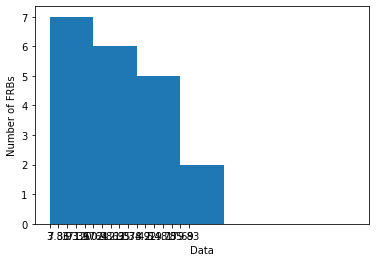

In [71]:
plt.hist(df_frb_repeater_with_non_empty_val['width'].values, bins = 7, range = (0,35))  
plt.ylabel('Number of FRBs')
plt.xlabel('Data');


In [64]:
df_frb_repeater_with_non_empty_val['width'].values

array(['3', '7.86', '3.93', '37.36', '1.97', '20.64', '0.98', '21.63',
       '2.95', '0.98', '12.78', '3.93', '33.42', '4.92', '5.9', '14.75',
       '8.85', '3.93', '17.69', '9.83'], dtype=object)

In [28]:
for j in np.arange(0, len(df_frb['frb'])):
    
    if df_frb.iloc[j, 0] == 'FRB 20180908A':
        print(j)
                

114


In [ ]:
def intrinsic_width(disp_measure, freq_channel_bandwidth, central_freq, sampling_time, Obs_time):
    
    t_DM = 8.3*0.001*disp_measure*(freq_channel_bandwidth/(central_freq)^3)
    
    intrinsic_time = np.sqrt(obs_time**2 - t_DM**2 - sampling_time**2)

In [38]:
df_frb[1:5]

,frb,utc,mjd,telescope,ra,dec,l,b,frequency,dm,flux,width,fluence,redshift
1,FRB 20010305A,2001-03-05 12:29:16,51973.52032,Parkes,4:57:20,-52:36:25,260.07,-38.35,1374,350.0,0.42,9,3.78,0.341
2,FRB 20010312A,2001-03-12 11:06:48,51980.46306,Parkes,5:26:55,-64:56:19,274.72,-33.30,-,1187.0,0.25,-,-,1.0897
3,FRB 20010621A,2001-06-21 13:02:11,52081.54318,Parkes,18:52:05,-8:29:35,25.43,-4.00,-,745.0,0.41,-,-,0.4454
4,FRB 20010724A,2001-07-24 19:50:02,52114.82641,Parkes,1:18:06,-75:12:18,300.65,-41.81,-,375.0,30,-,-,0.369


In [34]:
column_names = ['source', 'Observed_width', 'intrinsic_width', 'flux', 'fluence', 'distance']

df_repeaters = pd.DataFrame(columns= column_names)

In [35]:
df_repeaters

,source,Observed_width,intrinsic_width,flux,fluence,distance
